In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('winequality-red.csv', delimiter=';')


(b) Split the dataset into train, validation, and test sets. You can use scikit-learn’s train test split function.

In [3]:
X = data.drop('quality', axis=1)
y = data['quality']

# Split into train (70%) and test (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

(c) Write a program for training a simple linear regression model with sum-of-squares error function
using the closed-form solution (do not use a built-in function).

$$w^∗ = Φ^†t = (Φ^TΦ)^{-1}Φ^Tt$$

In [4]:
def linear_regression_closed_form(X, y):
    """
    Perform linear regression using the closed-form solution.

    Parameters:
    X (array-like): Feature matrix.
    y (array-like): Target variable.

    Returns:
    w_star (numpy array): Optimal weights (parameters) for the linear model.
    """

    # Add bias column for the intercept term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    # Closed-form solution
    w_star = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    return w_star

# Train the model on the training data
w = linear_regression_closed_form(X_train, y_train)
w

array([ 1.79625783e+01,  2.34704718e-02, -1.09961969e+00, -2.47859776e-01,
        7.73785620e-03, -1.67359251e+00,  4.55041815e-03, -3.26389168e-03,
       -1.42395563e+01, -3.19247444e-01,  8.12824701e-01,  2.91991158e-01])

(d) For the train data, generate a plot of the actual target values vs predicted target values. How do we interpret this plot?

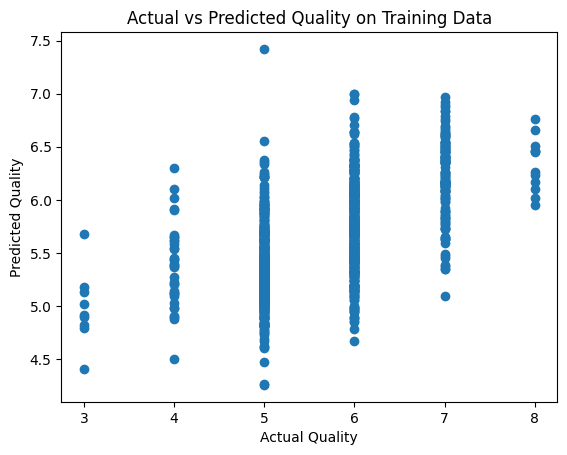

In [5]:
# Predict function

def predict(X, w):
    """
    Make predictions using a linear model.

    Parameters:
    X (array-like): Feature matrix.
    w (numpy array): Weights (parameters) of the linear model.

    Returns:
    numpy array: Predicted values.
    """

    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b.dot(w)

# Predictions on train data
y_train_pred = predict(X_train, w)

# Plotting
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality on Training Data')
plt.show()

Perfect accuracy would have all points lying on a diagonal line where predicted quality is equal to actual quality. Points that lie close to this diagonal line are more accurate predictions whereas points scattered away from the diagonal suggest prediction errors. The spread indicates the model's accuracy.

(e) Report the root-mean-square on the train and test sets.

In [6]:
# RMSE function
def rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE).

    Parameters:
    y_true (array-like): Actual values.
    y_pred (array-like): Predicted values.

    Returns:
    float: RMSE value.
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Compute RMSE for train and test sets
y_test_pred = predict(X_test, w)

train_rmse = rmse(y_train, y_train_pred)
test_rmse = rmse(y_test, y_test_pred)

print("RMSE on Training set:", train_rmse)
print("RMSE on Test set:", test_rmse)

RMSE on Training set: 0.6486806989670354
RMSE on Test set: 0.6450840357420413


f) Implement the least-mean-squares (LMS) algorithm for linear regression with random initialization of w(0) and stepsize(s) of your choice (you can experiment with that).

In [107]:
# Standardize the features to have mean 0 and standard deviation 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Add the bias term (column of ones)
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

# Random initialization of weights
np.random.seed(1)
w = np.random.randn(X_b.shape[1])

# Number of samples
n_samples = X_train_scaled.shape[0]

# Step size
stepsize = 0.015

# LMS Algorithm
for i in range(10000):
    n = np.random.randint(0, n_samples)
    y_pred = np.dot(X_b[n], w)
    error = y_train.iloc[n] - y_pred
    error_x = error * X_b[n]

    # Weight update
    w_new = w + stepsize * error_x
    w = w_new

    if error_x.all() < 10e-2:
      print("Converged at iteration", i)
      break

w

array([ 5.64325678, -0.05685266, -0.2075172 , -0.0721488 ,  0.02322434,
        0.0100768 , -0.03401707, -0.02294327,  0.11462481, -0.02393455,
        0.19914336,  0.35731832])

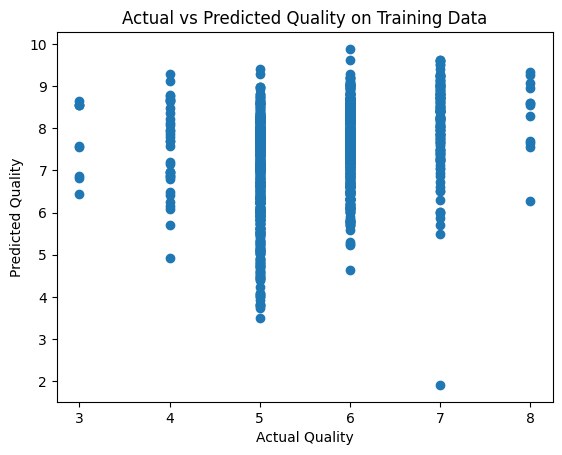

In [108]:
# Predictions on train data
y_train_pred = predict(X_train, w)

# Plotting
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted Quality on Training Data')
plt.show()

In [109]:
# RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Compute RMSE for train and test sets
y_test_pred = predict(X_test, w)

train_rmse = rmse(y_train, y_train_pred)
test_rmse = rmse(y_test, y_test_pred)

print("RMSE on Training set:", train_rmse)
print("RMSE on Test set:", test_rmse)

RMSE on Training set: 2.1096959336924535
RMSE on Test set: 2.161001114094545
